In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import cv2

In [3]:
from utilities.data.get_data import get_data

In [4]:
from cbir.cbir import CBIRPredictor

In [5]:
from utilities.data.get_images import download_image
from utilities.data.encoding import nparray_to_nparraybytes

In [6]:
query_params = {
    'START_AT': '2020-07-01',
    'END_AT': '2020-07-31',
}

In [7]:
df = get_data(query_params)

In [8]:
df.head()

id  user_id  route_id  route_unmatched model_version  \
0  16        3         9            False       cbir_v1   
1  16        3         9            False       cbir_v1   
2  16        3         9            False       cbir_v1   
3  16        3         9            False       cbir_v1   
4  16        3         9            False       cbir_v1   

                                                path  \
0  s3://climbicus-stag/route_images/from_users/gy...   
1  s3://climbicus-stag/route_images/from_users/gy...   
2  s3://climbicus-stag/route_images/from_users/gy...   
3  s3://climbicus-stag/route_images/from_users/gy...   
4  s3://climbicus-stag/route_images/from_users/gy...   

                        created_at  \
0 2020-07-08 16:54:27.676696+00:00   
1 2020-07-08 16:54:27.676696+00:00   
2 2020-07-08 16:54:27.676696+00:00   
3 2020-07-08 16:54:27.676696+00:00   
4 2020-07-08 16:54:27.676696+00:00   

                                         descriptors  db_id  db_route_id  \
0  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      1            1   
1  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      2            2   
2  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      3            1   
3  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      4            2   
4  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      5            3   

                     db_created_at  \
0 2020-07-08 16:28:23.262482+00:00   
1 2020-07-08 16:28:49.774320+00:00   
2 2020-07-08 16:29:45.005406+00:00   
3 2020-07-08 16:30:18.975801+00:00   
4 2020-07-08 16:30:59.764999+00:00   

                                             db_path  \
0  s3://climbicus-stag/route_images/from_users/gy...   
1  s3://climbicus-stag/route_images/from_users/gy...   
2  s3://climbicus-stag/route_images/from_users/gy...   
3  s3://climbicus-stag/route_images/from_users/gy...   
4  s3://climbicus-stag/route_images/from_users/gy...   

                                      db_descriptors  
0  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...  
1  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...  
2  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...  
3  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...  
4  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...

In [9]:
df.shape

(231, 13)

In [10]:
def reproduce(df):
#     df = df.sample(10)
    cbir_predictor = CBIRPredictor()
    cbir_predictor.init_matcher("flann")
    returned_series = df.apply(lambda x: cbir_predictor.match_images(x['descriptors'], x['db_descriptors']), axis=1)
    df[['matches', 'dist']] = pd.DataFrame(returned_series.tolist(), index=returned_series.index)  
    return df

In [11]:
df = reproduce(df)

In [12]:
df.shape

(231, 15)

In [23]:
df.head()

id  user_id  route_id  route_unmatched model_version  \
0  16        3         9            False       cbir_v1   
1  16        3         9            False       cbir_v1   
2  16        3         9            False       cbir_v1   
3  16        3         9            False       cbir_v1   
4  16        3         9            False       cbir_v1   

                                                path  \
0  s3://climbicus-stag/route_images/from_users/gy...   
1  s3://climbicus-stag/route_images/from_users/gy...   
2  s3://climbicus-stag/route_images/from_users/gy...   
3  s3://climbicus-stag/route_images/from_users/gy...   
4  s3://climbicus-stag/route_images/from_users/gy...   

                        created_at  \
0 2020-07-08 16:54:27.676696+00:00   
1 2020-07-08 16:54:27.676696+00:00   
2 2020-07-08 16:54:27.676696+00:00   
3 2020-07-08 16:54:27.676696+00:00   
4 2020-07-08 16:54:27.676696+00:00   

                                         descriptors  db_id  db_route_id  \
0  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      1            1   
1  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      2            2   
2  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      3            1   
3  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      4            2   
4  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...      5            3   

                     db_created_at  \
0 2020-07-08 16:28:23.262482+00:00   
1 2020-07-08 16:28:49.774320+00:00   
2 2020-07-08 16:29:45.005406+00:00   
3 2020-07-08 16:30:18.975801+00:00   
4 2020-07-08 16:30:59.764999+00:00   

                                             db_path  \
0  s3://climbicus-stag/route_images/from_users/gy...   
1  s3://climbicus-stag/route_images/from_users/gy...   
2  s3://climbicus-stag/route_images/from_users/gy...   
3  s3://climbicus-stag/route_images/from_users/gy...   
4  s3://climbicus-stag/route_images/from_users/gy...   

                                      db_descriptors  \
0  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...   
1  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...   
2  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...   
3  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...   
4  [b'\x93', b'N', b'U', b'M', b'P', b'Y', b'\x01...   

                                             matches   dist  
0  [<DMatch 0x7fd94de8ba70>, <DMatch 0x7fd94de8bb...   99.0  
1  [<DMatch 0x7fd94de93b50>, <DMatch 0x7fd94de95f...  185.0  
2  [<DMatch 0x7fd94de99b10>, <DMatch 0x7fd94de987...  101.0  
3  [<DMatch 0x7fd94de9cef0>, <DMatch 0x7fd94de9d1...  202.0  
4  [<DMatch 0x7fd94de9f870>, <DMatch 0x7fd94de9ee...  222.0

In [13]:
# df.groupby('id').dist.nsmallest(2)

There will be images that have no route id _ route_unmatched - incorrect. See which ones it matched with. 

Ignore where no route id and route_unmatched False.

With route id - correct.

Need to match each row. Then group by id, and get the lowest distances. 
Then group by status - route id / route_unmatched. 

In [14]:
# Visualise the wrong ones

In [25]:
import numpy as np
import cv2
MAX_IMG_WIDTH = 512
CV_LOAD_IMAGE_GRAYSCALE = 0
def old_process_image(fbytes_image):
    """
    The input image needs to be the right format, colour and size
    JPEG compression is left for the app
    """
    img_arr = np.frombuffer(fbytes_image, np.uint8)
    img = cv2.imdecode(img_arr, 1)
    if img is None:
        raise InvalidImageException()

    # resizing required for the predictor
    w = img.shape[1]
    h = img.shape[0]
    ratio = w / MAX_IMG_WIDTH
    if ratio > 1:
        w = int(w / ratio)
        h = int(h / ratio)
    dim = (w, h)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return resized

In [28]:
import matplotlib.pyplot as plt
def draw_matches(df_i, regen_matches=False):
    cbir_predictor = CBIRPredictor()
    cbir_predictor.init_matcher("flann")
    
    fbytes_image1 = download_image(df.iloc[df_i].path)
    fbytes_image2 = download_image(df.iloc[df_i].db_path)

    img1 = old_process_image(fbytes_image1)
    img2 = old_process_image(fbytes_image2)
#     plt.imshow(img1); plt.show()
    if regen_matches:
        img1 = cbir_predictor.process_image(fbytes_image1)
        img2 = cbir_predictor.process_image(fbytes_image2)
    
    kp1, des1 = cbir_predictor.generate_descriptors(img1)
    kp2, des2 = cbir_predictor.generate_descriptors(img2)
    matches = df.iloc[df_i].matches
    dist = df.iloc[df_i].dist
    if regen_matches:
        matches, dist = cbir_predictor.match_images(nparray_to_nparraybytes(des1), nparray_to_nparraybytes(des2)) 
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], img2, flags=2) # Show top 10 matches
    return img_matches, dist
#     plt.figure(figsize=(8, 8))
#     print(df.iloc[df_i].dist)
#     plt.imshow(img_matches); plt.show()


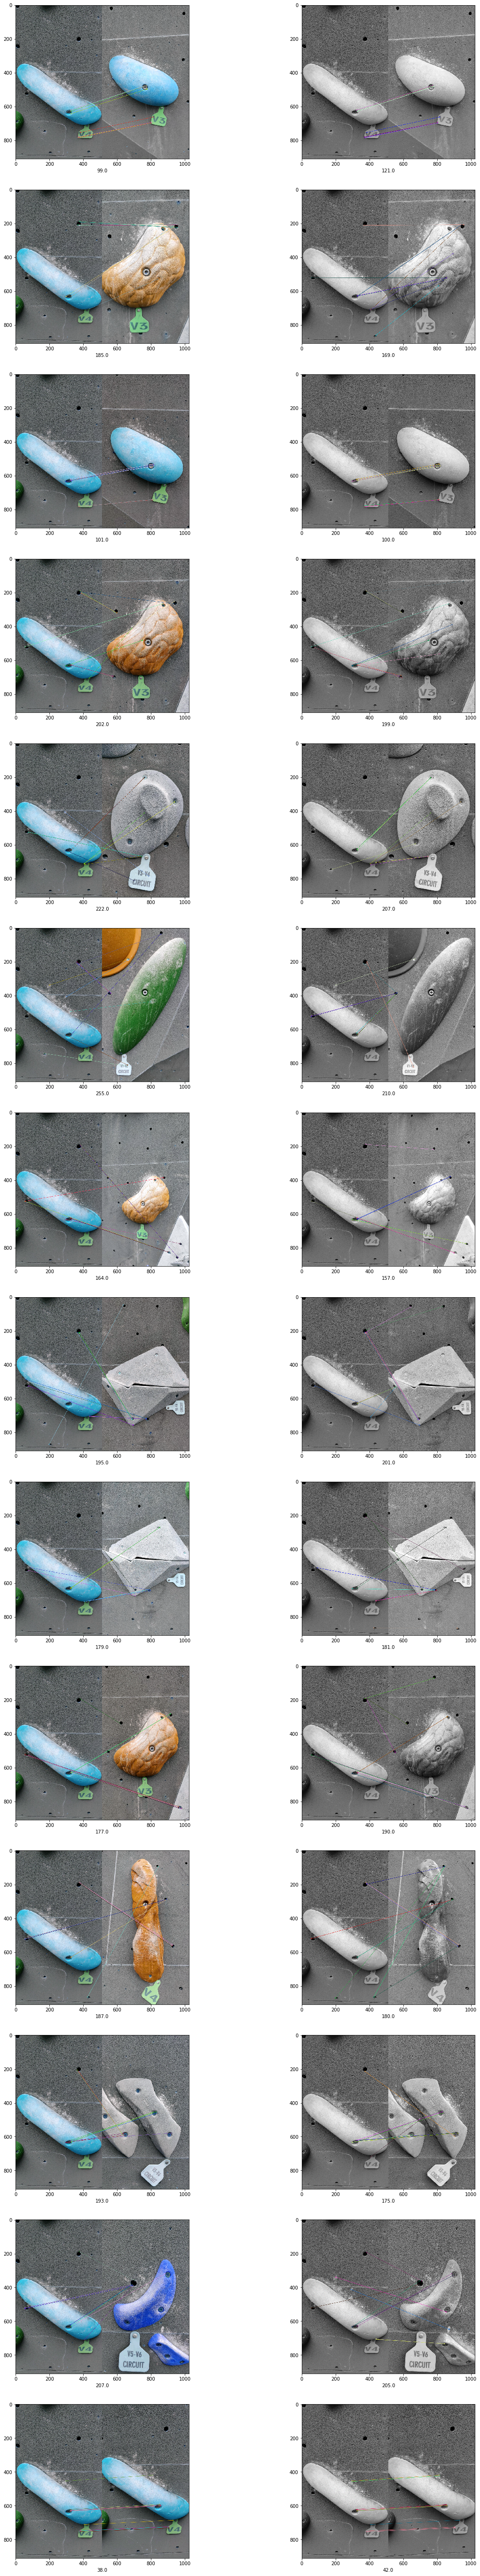

In [29]:
fig, ax = plt.subplots(df[df.id==16].shape[0], 2, figsize=(20,100))

for n, i in enumerate(df[df.id==16].index.tolist()):
    imgmatches, dist = draw_matches(i)
    ax[n, 0].imshow(imgmatches)
    ax[n, 0].set_xlabel(dist)
    imgmatches, dist = draw_matches(i, regen_matches=True)
    ax[n, 1].imshow(imgmatches)
    ax[n, 1].set_xlabel(dist)